In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train.shape

(188340, 10)

In [5]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [7]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [8]:
test.shape

(22265, 8)

In [9]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [10]:
train.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1168691,NaN,S1,L1,R1,2018-04-24,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


In [11]:
train.Store_id.value_counts()

128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64

In [12]:
train.Holiday.value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [13]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [14]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [15]:
train.Date.value_counts()

2018-04-24    365
2018-06-17    365
2018-06-02    365
2019-05-30    365
2018-08-04    365
             ... 
2019-05-12    365
2018-06-08    365
2019-01-14    365
2018-04-18    365
2018-03-05    365
Name: Date, Length: 516, dtype: int64

In [16]:
train['month'] = ''
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,


In [17]:
"""
def month(date):
    return date.split('-')[1]

train['month'] = train['Date'].apply(lambda date : month(date))
train
"""
train.drop(['Date'],axis=1,inplace=True)
test.drop(['Date'],axis=1,inplace=True)

In [18]:
#test['month'] = test['Date'].apply(lambda date : month(date))
#test

In [19]:
#train.drop(['Date'],axis=1,inplace=True)
#test.drop(['Date'],axis=1,inplace=True)

In [20]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,month
0,1,S1,L3,R1,1,Yes,9,7011.84,
1,253,S4,L2,R1,1,Yes,60,51789.12,
2,252,S3,L2,R1,1,Yes,42,36868.20,
3,251,S2,L3,R1,1,Yes,23,19715.16,
4,250,S2,L3,R4,1,Yes,62,45614.52,


In [21]:
train.drop(['#Order'],axis=1,inplace=True)

In [22]:
train = train.astype({'Store_id':'object' , 'Holiday':'object'})

In [23]:
test = test.astype({'Store_id':'object' , 'Holiday':'object'})

In [24]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month
0,1,S1,L3,R1,1,Yes,7011.84,
1,253,S4,L2,R1,1,Yes,51789.12,
2,252,S3,L2,R1,1,Yes,36868.20,
3,251,S2,L3,R1,1,Yes,19715.16,
4,250,S2,L3,R4,1,Yes,45614.52,


<AxesSubplot:xlabel='Sales', ylabel='Density'>

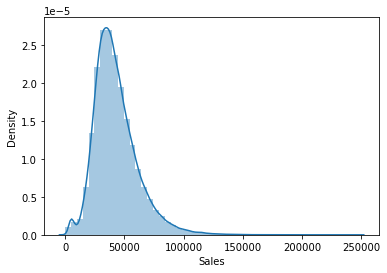

In [25]:
sns.distplot(train.Sales)

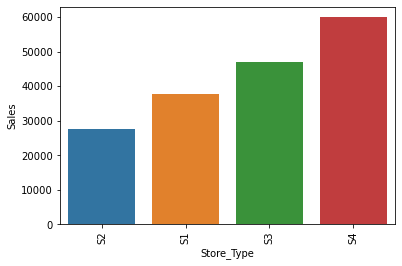

In [26]:
b = pd.pivot_table(train, index='Store_Type', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

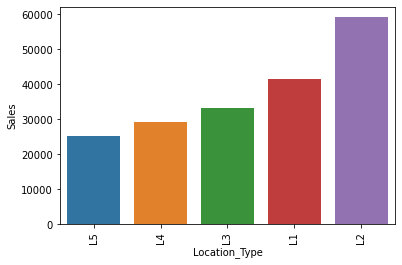

In [27]:
b = pd.pivot_table(train, index='Location_Type', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

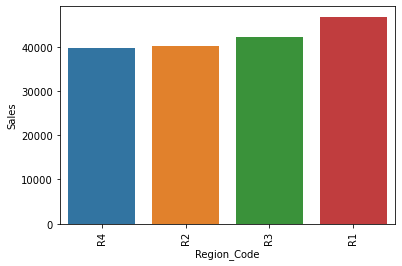

In [28]:
b = pd.pivot_table(train, index='Region_Code', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

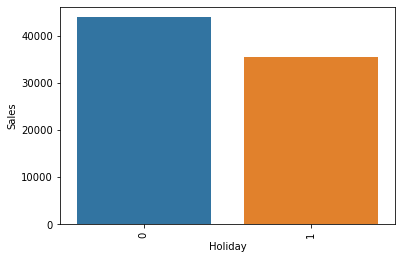

In [29]:
b = pd.pivot_table(train, index='Holiday', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='Holiday', ylabel='count'>

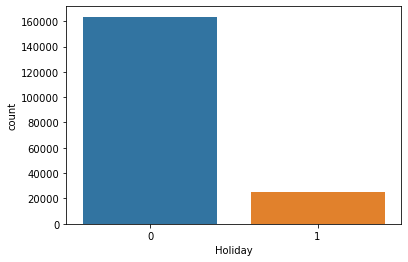

In [30]:
sns.countplot(train.Holiday)

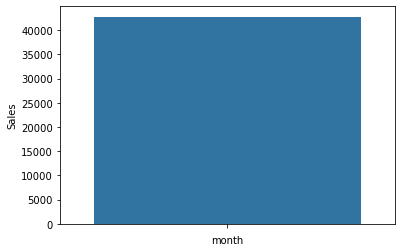

In [31]:
b = pd.pivot_table(train, index='month', values = 'Sales').sort_values(by = 'Sales')
chart = sns.barplot(x=b.index,y=b['Sales'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [32]:
train.drop(['Region_Code'],axis=1,inplace=True)
test.drop(['Region_Code'],axis=1,inplace=True)

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

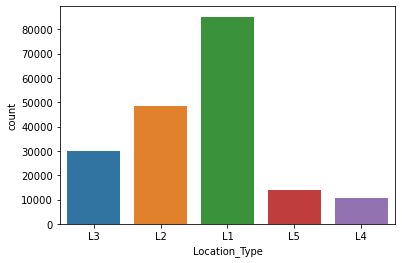

In [33]:
sns.countplot(train.Location_Type)

In [34]:
train.drop(['Store_id'],axis=1,inplace=True)
test.drop(['Store_id'],axis=1,inplace=True)

In [35]:
train.head()

,Store_Type,Location_Type,Holiday,Discount,Sales,month
0,S1,L3,1,Yes,7011.84,
1,S4,L2,1,Yes,51789.12,
2,S3,L2,1,Yes,36868.20,
3,S2,L3,1,Yes,19715.16,
4,S2,L3,1,Yes,45614.52,


In [36]:
X = train.drop(['Sales'],1)
y = train['Sales']

In [37]:
X

,Store_Type,Location_Type,Holiday,Discount,month
0,S1,L3,1,Yes,
1,S4,L2,1,Yes,
2,S3,L2,1,Yes,
3,S2,L3,1,Yes,
4,S2,L3,1,Yes,
...,...,...,...,...,...
188335,S2,L3,1,Yes,
188336,S4,L2,1,No,
188337,S1,L3,1,No,
188338,S3,L1,1,Yes,


In [38]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Holiday_1,Discount_Yes
0,0,0,0,0,1,0,0,1,1
1,0,0,1,1,0,0,0,1,1
2,0,1,0,1,0,0,0,1,1
3,1,0,0,0,1,0,0,1,1
4,1,0,0,0,1,0,0,1,1


In [39]:
test = pd.get_dummies(test,drop_first=True)
test.head()

,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Holiday_1,Discount_Yes
0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

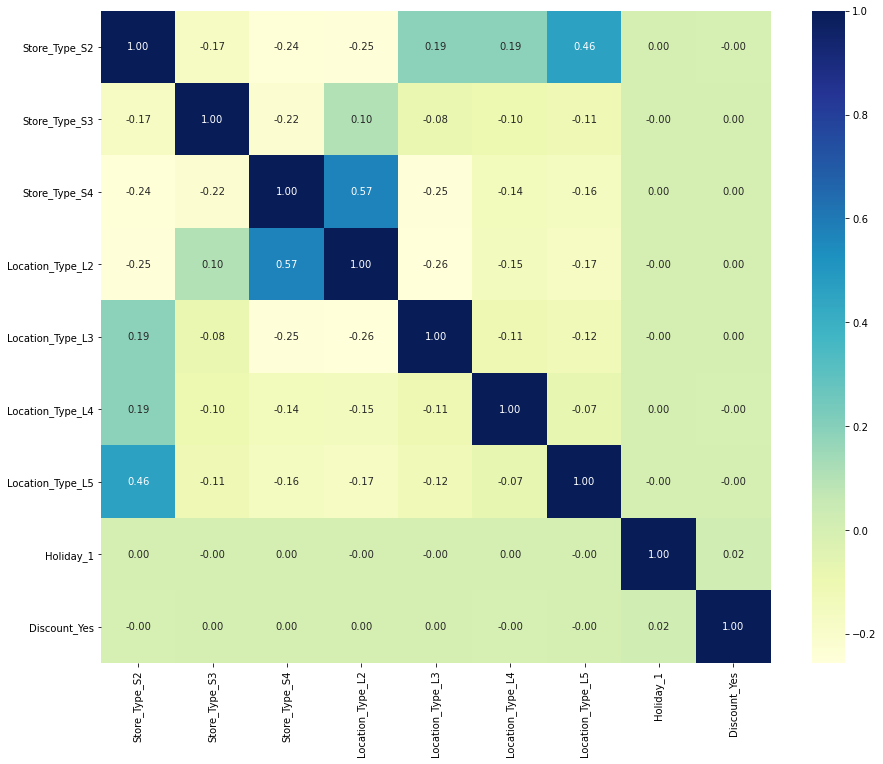

In [40]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), fmt='.2f', annot=True, cmap = 'YlGnBu')


In [41]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=365)

In [42]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [43]:
train_pred = lassoReg.predict(X_train)

In [44]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_train, train_pred)*1000

117.80333749213568

In [45]:
val_pred = lassoReg.predict(X_val)
mean_squared_log_error(y_val, val_pred)*1000

112.31325352002075

In [46]:
test_pred = lassoReg.predict(test)

In [55]:
sub = pd.read_csv('SAMPLE.csv')
sub.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [56]:
sub['Sales'] = test_pred
sub.head()

,ID,Sales
0,T1188341,58770.175396
1,T1188342,34396.388747
2,T1188343,58770.175396
3,T1188344,34396.388747
4,T1188345,34396.388747


In [57]:
sub.to_csv('baseline_lasso.csv',index=False)

In [51]:
sub.shape


(22265, 2)

In [52]:
len(test_pred)

22265

In [58]:
subq = pd.read_csv('baseline_lasso.csv')
subq.shape

(22265, 2)

In [54]:
subq.head()

,Unnamed: 0,ID,Sales
0,0,T1188341,58770.175396
1,1,T1188342,34396.388747
2,2,T1188343,58770.175396
3,3,T1188344,34396.388747
4,4,T1188345,34396.388747
